In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.chdir(r'E:\Data science course\course 9.  Data mining and advanced statistical modeling')
df = pd.read_csv("bank.csv")
df

y =df.iloc[:,9]
X = df.iloc[:,:9]

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. 
The dataset gives you information about a marketing campaign of a financial institution in which 
you will have to analyze in order to find ways to look for future strategies in order to
improve future marketing campaigns for the bank.Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.



Summary of processes

    Review dataframe

    head, tail, shape
    duplicates, info, dtypes
    review each feature (column name)

    Clean Data

    check for discrepencies
    fill unknown/null values

    Visual EDA
    Data Preprocessing



In [86]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

In [19]:


plt.style.use('fivethirtyeight')



In [87]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [88]:
df.describe

<bound method NDFrame.describe of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  cam

In [89]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [90]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [25]:
df.shape

(11162, 17)



Dataset has over 11,100 observations and 17 features

Next, check for duplicated observations and review general information (data types, shape, null values)

Check for duplicated observations and review general information


In [26]:
df.duplicated().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [28]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

Input variables:

    age (numeric)
    job : type of job (categorical)
    marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    education (categorical: "unknown","secondary","primary","tertiary")
    default: has credit in default? (binary: "yes","no")
    balance: average yearly balance, in euros (numeric)
    housing: has housing loan? (binary: "yes","no")
    loan: has personal loan? (binary: "yes","no")
    contact: contact communication type (categorical: "unknown","telephone","cellular")
    day: last contact day of the month (numeric)
    month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    duration: last contact duration, in seconds (numeric)
    campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    previous: number of contacts performed before this campaign and for this client (numeric)
    poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


Output variable (desired target):

    deposit: has the client subscribed a term deposit? (binary: "yes","no")




Let's take a look at the numeric features with the describe() method.

The values have pretty high variance and we will likely apply normalisation of the data so that the large values will not affect our machine learining model later.

The minimum of balance is negative, which is possible due to overdrawn accounts. The minimum of pdays is negative, which is possible as it indicates that the customer is a fresh lead.




Review numeric features


In [91]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000




Numeric data for the features are not on the same scale. Normalisation of the data needs to be applied before applying machine learning model later

Next review categorical featues, their unique values and their counts


In [92]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


    The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
    The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
    Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [93]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


In [94]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,47.365043,1371.835267,15.689869,392.481825,2.457077,46.651199,0.664346
married,44.533617,1599.927570,15.678791,361.063769,2.621477,49.505432,0.822233
single,33.017339,1457.255259,15.608869,384.195566,2.323195,56.344798,0.913019


In [95]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237


In [30]:


for col in df.select_dtypes(include='object').columns: 
    print(col, "column")
    print("Number of unique:", df[col].nunique())
    print(df[col].value_counts(), '\n')



job column
Number of unique: 12
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

marital column
Number of unique: 3
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

education column
Number of unique: 4
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

default column
Number of unique: 2
no     10994
yes      168
Name: default, dtype: int64 

housing column
Number of unique: 2
no     5881
yes    5281
Name: housing, dtype: int64 

loan column
Number of unique: 2
no     9702
yes    1460
Name: loan, dtype: int64 

contact column
Number of unique: 3
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64 

month column
Number of unique: 12
may  

pdays with '-1' values and poutcome with 'unknown' should be consistent to identify as new leads

In [31]:


print('number of pdays with -1:', (df['pdays']==-1).sum())
print('number of poutcome with unknown:', (df['poutcome']=='unknown').sum())



number of pdays with -1: 8324
number of poutcome with unknown: 8326




number of counts show discrepencies


In [32]:
i = df[(df['poutcome']=='unknown') & (df['pdays']!=-1)].index
df.iloc[i]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2848,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
5220,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes


Revise poutcome values for discrepency to 'failure'

In [33]:


df['poutcome'].iloc[i] = 'failure'
df.iloc[i]



C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2848,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,failure,yes
5220,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,failure,yes




Assume poutcome values with 'other' to be 'failure', since model is a binary classifier.

Contacts cannot be unknown since it is telemarketing campaign. They need to be contacted by some means. Hence populate randomly with celluar and telephone


In [34]:


df['poutcome'].replace({'other':'failure'}, inplace=True)

np.random.seed(42)
i = df[df['contact'] == 'unknown'].index
df['contact'].iloc[i] = np.random.choice(a=['cellular', 'telephone'], size=len(i), p=(.774, .226))



C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:


# final review
for col in df.select_dtypes(include='object').columns: 
    print(col, "column")
    print("Number of unique:", df[col].nunique())
    print(df[col].value_counts(), '\n')



job column
Number of unique: 12
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64 

marital column
Number of unique: 3
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64 

education column
Number of unique: 4
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64 

default column
Number of unique: 2
no     10994
yes      168
Name: default, dtype: int64 

housing column
Number of unique: 2
no     5881
yes    5281
Name: housing, dtype: int64 

loan column
Number of unique: 2
no     9702
yes    1460
Name: loan, dtype: int64 

contact column
Number of unique: 2
cellular     9853
telephone    1309
Name: contact, dtype: int64 

month column
Number of unique: 12
may    2824
aug    1519

# Graphical EDA

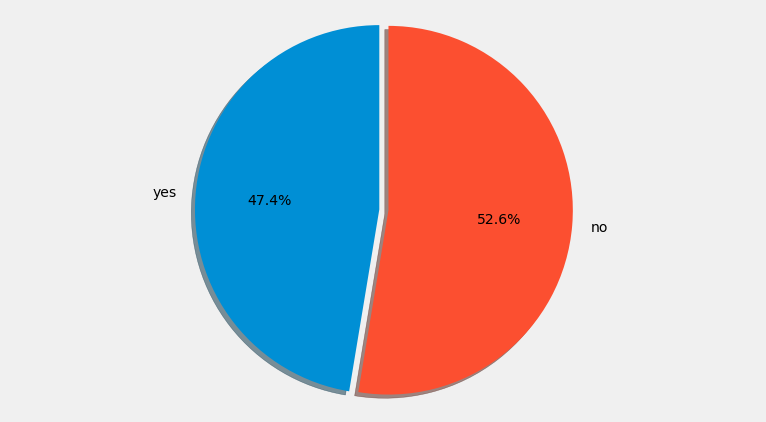

In [36]:
labels = df['deposit'].unique()
fig1, ax1 = plt.subplots(figsize=(12, 7))
exp = [0,.05]
ax1.pie(df['deposit'].value_counts(ascending=True), explode=exp, labels=labels, autopct='%1.1f%%', pctdistance=0.6,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Dataset is pretty balanced. Baseline accuracy at 47.4%

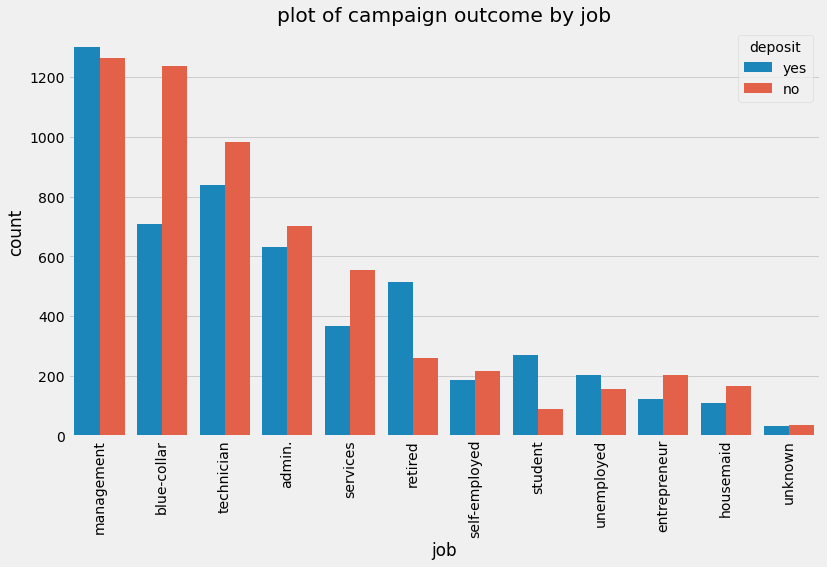

In [37]:


plt.figure(figsize=(12,7))
sns.countplot(data=df, x='job', order = df['job'].value_counts().index, hue='deposit')
plt.xticks(rotation=90)
plt.title("plot of campaign outcome by job")

plt.show()





can potentially merge some of the columns for improving model later. ie (blue-collar and technician, self-employed and entrepreneur)


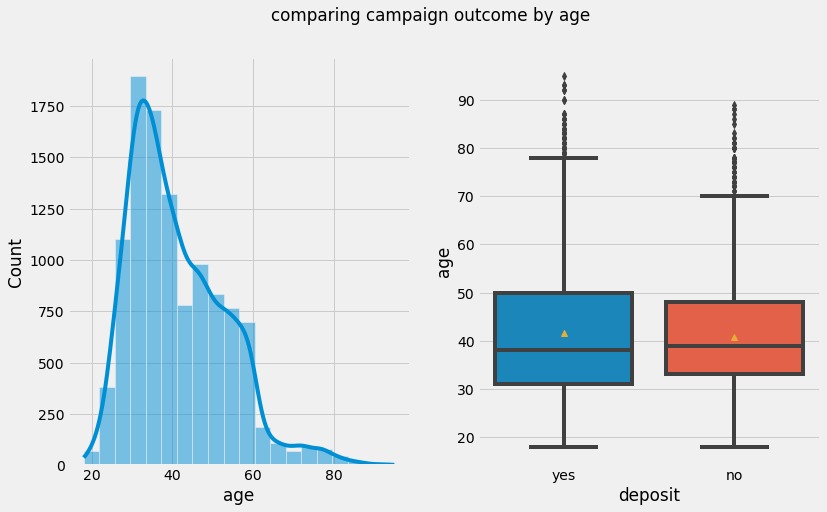

In [38]:


fig = plt.figure(figsize=(12, 7))

fig.add_subplot(121)
sns.histplot(data=df, x='age', bins=20, kde=True)

fig.add_subplot(122)
sns.boxplot(data=df, x='deposit', y='age', showmeans=True)
fig.suptitle('comparing campaign outcome by age')
plt.show()



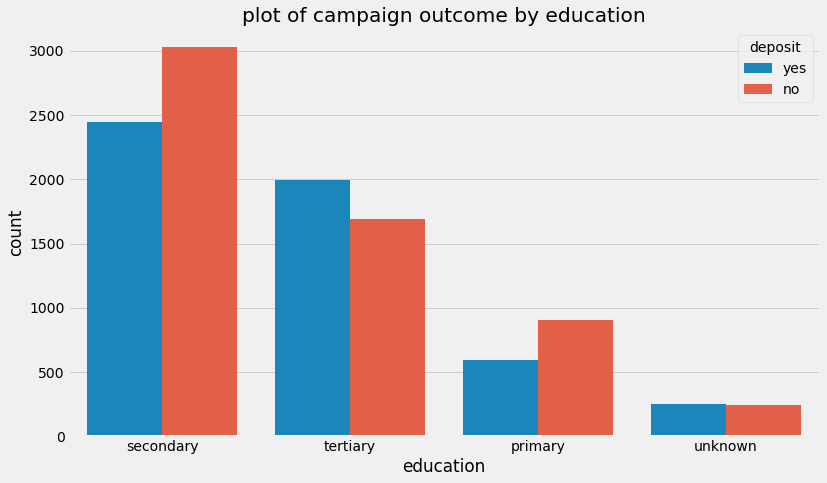

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='education', order = df['education'].value_counts().index, hue='deposit')
#plt.xticks(rotation=90)
plt.title("plot of campaign outcome by education")

plt.show()

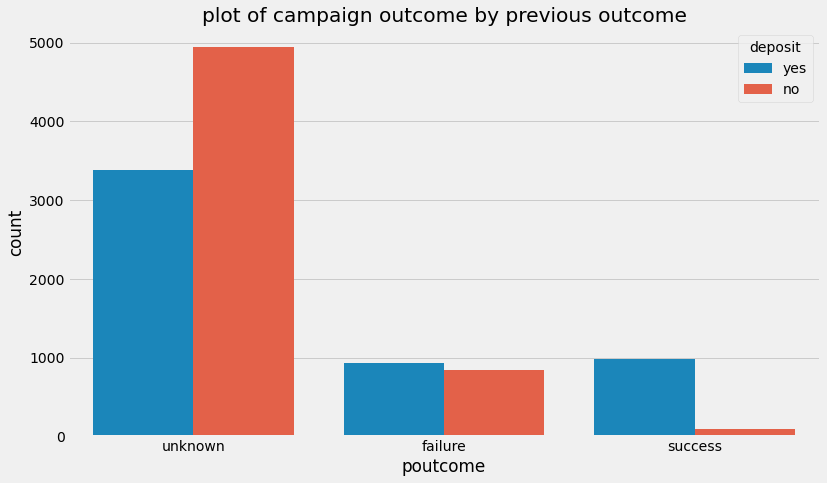

In [40]:


plt.figure(figsize=(12,7))
sns.countplot(data=df, x='poutcome', order = df['poutcome'].value_counts().index, hue='deposit')
#plt.xticks(rotation=90)
plt.title("plot of campaign outcome by previous outcome")

plt.show()



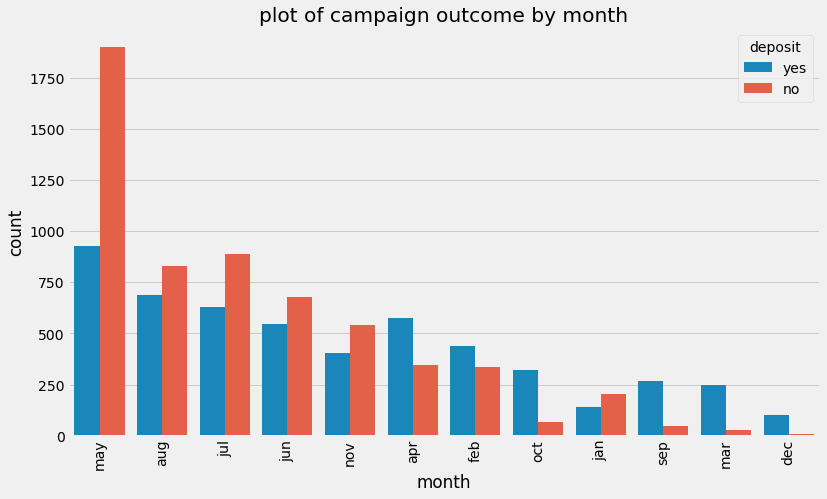

In [41]:


plt.figure(figsize=(12,7))
sns.countplot(data=df, x='month', order = df['month'].value_counts().index, hue='deposit')
plt.xticks(rotation=90)
plt.title("plot of campaign outcome by month")

plt.show()



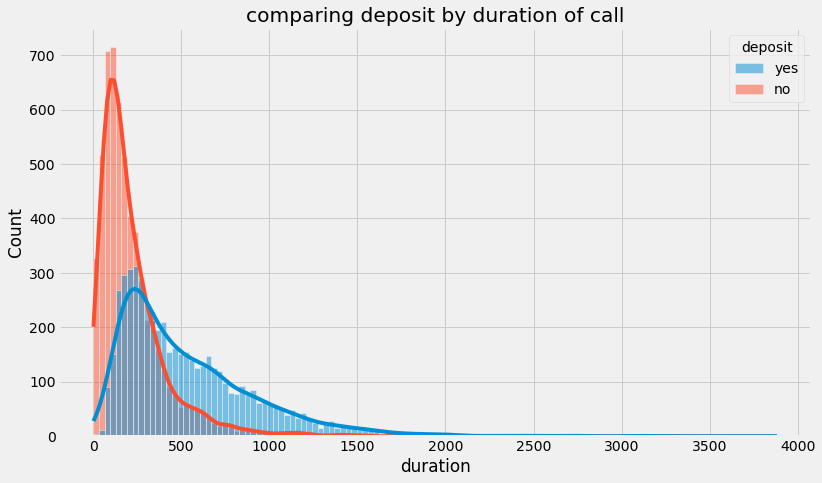

In [42]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x='duration', hue='deposit', kde=True)
plt.title('comparing deposit by duration of call')

plt.show()

Explore and Visualize the features

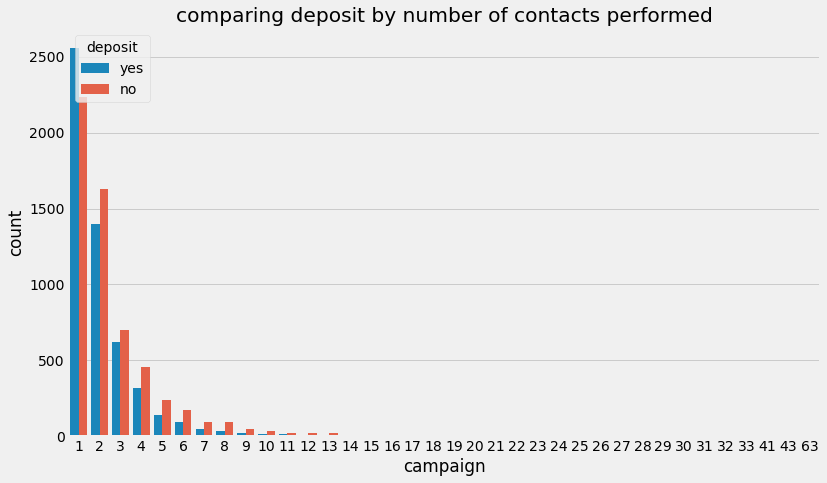

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='campaign', hue='deposit')
plt.title('comparing deposit by number of contacts performed')

plt.show()


Preprocessing data

    Normalise numeric features
    Apply ordinal encoding where possible for catetorical data
    Otherise apply one hot encoding



In [44]:


#processing and scaling numerical data columns
scaler = StandardScaler()
num_df = df.select_dtypes(include=np.number)
num_df_arr = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_df_arr, columns=num_df.columns)
num_df



,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332


In [45]:
# apply ordinal label to ordinal categorical data# the order of data is matter
cat_df = df.select_dtypes(include='object')

binary_dict = {'yes':1, 'no':0}
calendar_dict = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
                 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
education_dict = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}

cat_df['deposit'].replace(binary_dict, inplace=True)
cat_df['default'].replace(binary_dict, inplace=True)
cat_df['housing'].replace(binary_dict, inplace=True)
cat_df['loan'].replace(binary_dict, inplace=True)
cat_df['month'].replace(calendar_dict, inplace=True)
cat_df['education'].replace(education_dict, inplace=True)

cat_df

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,2,0,1,0,cellular,5,unknown,1
1,admin.,married,2,0,0,0,telephone,5,unknown,1
2,technician,married,2,0,1,0,cellular,5,unknown,1
3,services,married,2,0,1,0,cellular,5,unknown,1
4,admin.,married,3,0,0,0,cellular,5,unknown,1
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,1,0,1,0,cellular,4,unknown,0
11158,services,married,2,0,0,0,cellular,6,unknown,0
11159,technician,single,2,0,0,0,cellular,8,unknown,0
11160,technician,married,2,0,0,1,cellular,5,failure,0


In [46]:


# new dataset with scaled numerical data and ordinal categorical features
df2 = pd.concat([cat_df, num_df], axis=1)
df2



,job,marital,education,default,housing,loan,contact,month,poutcome,deposit,age,balance,day,duration,campaign,pdays,previous
0,admin.,married,2,0,1,0,cellular,5,unknown,1,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,admin.,married,2,0,0,0,telephone,5,unknown,1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,technician,married,2,0,1,0,cellular,5,unknown,1,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,services,married,2,0,1,0,cellular,5,unknown,1,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,admin.,married,3,0,0,0,cellular,5,unknown,1,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,1,0,1,0,cellular,4,unknown,0,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,-0.481184,-0.363260
11158,services,married,2,0,0,0,cellular,6,unknown,0,-0.187357,-0.246658,0.040612,-0.832564,0.547981,-0.481184,-0.363260
11159,technician,single,2,0,0,0,cellular,8,unknown,0,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,-0.481184,-0.363260
11160,technician,married,2,0,0,1,cellular,5,failure,0,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,1.109571,1.818332




Checking for correlation


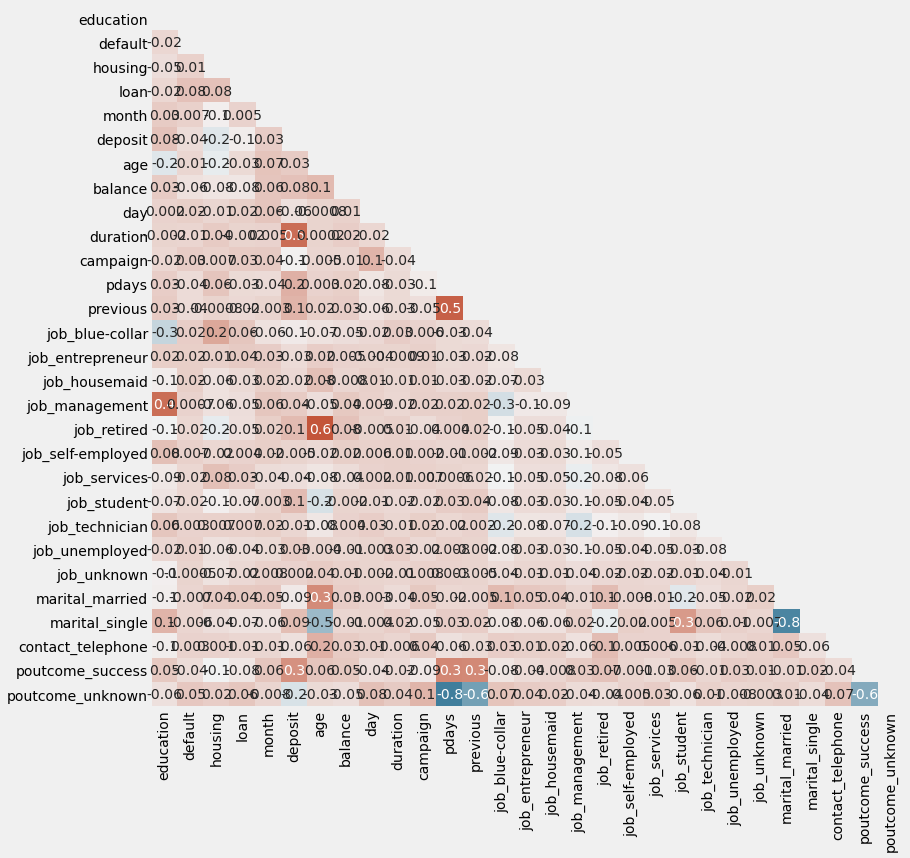

In [63]:
mask = np.triu(np.ones_like(df2.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), mask=mask, annot=True, fmt='.1g', cmap=cmap, cbar=False)
plt.show()



Note

    While duration and deposit may show correlation, duration should not be used in final predictive model. Reason being that we can never have this information before a telemarketing campaign begins. (Reminder: duration refers to the total time spent during current campaign talking to customer)
    Hence the same can be applied for campaign, which is the number contacts made with the customer during this campaign
    previous and pdays, appears to have some correlation. As we are assuming independence of features, one of them can be removed later in the feature selection/engineering step.



In [48]:


# apply one hot encoding to the rest of the categorical features
df2 = pd.get_dummies(df2, drop_first=True)
df2



,education,default,housing,loan,month,deposit,age,balance,day,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,poutcome_success,poutcome_unknown
0,2,0,1,0,5,1,1.491505,0.252525,-1.265746,1.930226,...,0,0,0,0,0,1,0,0,0,1
1,2,0,0,0,5,1,1.239676,-0.459974,-1.265746,3.154612,...,0,0,0,0,0,1,0,1,0,1
2,2,0,1,0,5,1,-0.019470,-0.080160,-1.265746,2.929901,...,0,0,1,0,0,1,0,0,0,1
3,2,0,1,0,5,1,1.155733,0.293762,-1.265746,0.596366,...,1,0,0,0,0,1,0,0,0,1
4,3,0,0,0,5,1,1.071790,-0.416876,-1.265746,0.867171,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,1,0,4,0,-0.691015,-0.473616,0.515650,-0.331287,...,0,0,0,0,0,0,1,0,0,1
11158,2,0,0,0,6,0,-0.187357,-0.246658,0.040612,-0.832564,...,1,0,0,0,0,1,0,0,0,1
11159,2,0,0,0,8,0,-0.774958,-0.464934,0.396891,-0.622258,...,0,0,1,0,0,0,1,0,0,1
11160,2,0,0,1,5,0,0.148416,-0.473926,-0.909466,-1.045752,...,0,0,1,0,0,1,0,0,0,0


Preparing and splitting training and test data

In [49]:


X = df2.drop(columns='deposit')
X



,education,default,housing,loan,month,age,balance,day,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,poutcome_success,poutcome_unknown
0,2,0,1,0,5,1.491505,0.252525,-1.265746,1.930226,-0.554168,...,0,0,0,0,0,1,0,0,0,1
1,2,0,0,0,5,1.239676,-0.459974,-1.265746,3.154612,-0.554168,...,0,0,0,0,0,1,0,1,0,1
2,2,0,1,0,5,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,...,0,0,1,0,0,1,0,0,0,1
3,2,0,1,0,5,1.155733,0.293762,-1.265746,0.596366,-0.554168,...,1,0,0,0,0,1,0,0,0,1
4,3,0,0,0,5,1.071790,-0.416876,-1.265746,0.867171,-0.186785,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1,0,1,0,4,-0.691015,-0.473616,0.515650,-0.331287,-0.554168,...,0,0,0,0,0,0,1,0,0,1
11158,2,0,0,0,6,-0.187357,-0.246658,0.040612,-0.832564,0.547981,...,1,0,0,0,0,1,0,0,0,1
11159,2,0,0,0,8,-0.774958,-0.464934,0.396891,-0.622258,-0.186785,...,0,0,1,0,0,0,1,0,0,1
11160,2,0,0,1,5,0.148416,-0.473926,-0.909466,-1.045752,-0.186785,...,0,0,1,0,0,1,0,0,0,0


In [50]:
y = df2['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:

Applying Machine learning models

    Models to be applied

    Logistic Regression, Support Vector Machine, 
    Metrics to study -

    Quantitative - Accuracy score, Recall, Precision
    Visual - Confusion matrix, ROC curve



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [64]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.20)#default test_size=0.25
X_test.head()

,education,default,housing,loan,month,age,balance,day,duration,campaign,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,poutcome_success,poutcome_unknown
9058,0,0,1,0,5,-0.019470,-0.446641,-0.553187,-0.769185,-0.554168,...,1,0,0,0,0,1,0,0,0,0
3279,2,0,0,1,2,1.239676,0.126954,1.228209,-0.411952,-0.554168,...,0,0,1,0,0,1,0,0,1,0
6502,2,0,0,1,7,-0.942844,-0.397963,-0.909466,-0.532950,-0.186785,...,1,0,0,0,0,0,1,0,0,1
9327,3,0,1,0,7,-0.607072,-0.041094,0.159371,0.743292,-0.554168,...,0,0,0,0,0,0,1,0,0,1
9965,2,0,1,0,5,-1.026787,-0.477957,-0.196908,0.403345,0.180598,...,0,0,1,0,0,0,1,0,0,1


In [65]:
y_test.head()

9058    0
3279    1
6502    0
9327    0
9965    0
Name: deposit, dtype: int64

In [66]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train,y_train)

LogisticRegression(max_iter=500, tol=0.001)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

In [68]:
from sklearn.linear_model import LogisticRegression
#Let's create a model again using the default settings
model = LogisticRegression()

In [69]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
model.intercept_ #b0

array([0.05489746])

In [71]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[ 0.13332866, -0.02667823, -0.5285966 , -0.21800321, -0.03074229,
         0.03170334,  0.14521832, -0.04534873,  1.7831277 , -0.30773018,
         0.02620182,  0.04174915, -0.19196354, -0.0956703 , -0.09407603,
        -0.07391737,  0.09760571, -0.07059382, -0.1189448 ,  0.12983834,
        -0.09538309, -0.01765585, -0.04023132, -0.07671557,  0.0690344 ,
        -0.09520346,  0.62978217, -0.28069756]])

In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [73]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [74]:
#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)# for each record returnd 2 values 1st one is proabality to be 0 ,2nd one is proabality to be 1(positive) 

array([[0.8730063 , 0.1269937 ],
       [0.13834939, 0.86165061],
       [0.7950294 , 0.2049706 ],
       ...,
       [0.00199734, 0.99800266],
       [0.73335374, 0.26664626],
       [0.75417087, 0.24582913]])

In [75]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]# Since in python indexes start from 0, the 2nd column has index=1
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([0.57873885, 0.47577922, 0.60091354, 0.6737451 , 0.07381302,
       0.40965578, 0.86487772, 0.16262286, 0.19612344, 0.95056817])

In [76]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [77]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.75)#probabilities_test is 1d array that we defined before
y_predict_thresh[10:20]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [78]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.8029556650246306

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.8029556650246306

In [80]:

cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[1009,  196],
       [ 244,  784]], dtype=int64)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1205
           1       0.80      0.76      0.78      1028

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233



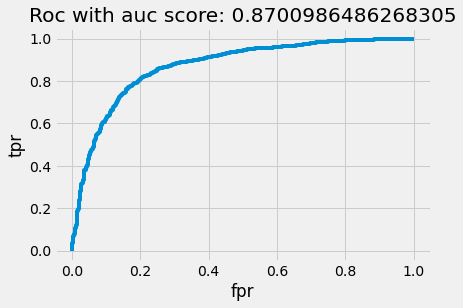

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

As we can see from the plot above, this logistic regression model does a pretty poor job of classifying the data into categories.

To quantify this, we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.

The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

In [52]:


# logistic regression
logreg = LogisticRegression().fit(X_train, y_train)
ypred_logreg = logreg.predict(X_test)



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:


# SVM.svc
svc= SVC(probability=True).fit(X_train, y_train)
ypred_svc = svc.predict(X_test)



In [56]:


print('Logistic Regression\n', classification_report(y_test, ypred_logreg))
print('Support Vector Machine\n', classification_report(y_test, ypred_svc))

Logistic Regression
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1175
           1       0.80      0.74      0.77      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Support Vector Machine
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      1175
           1       0.81      0.81      0.81      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



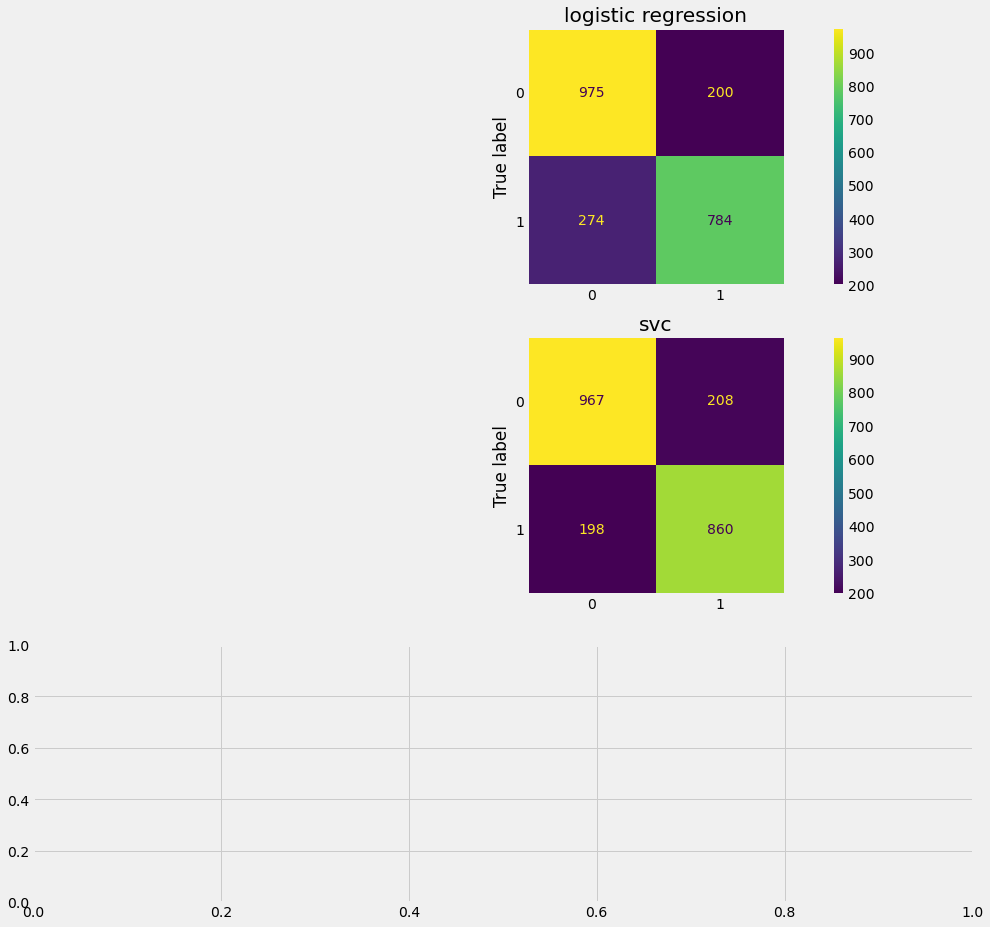

In [57]:


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax1)
ax1.grid(False)
ax1.set_xlabel("")
ax1.set_title('logistic regression')

plot_confusion_matrix(svc, X_test, y_test, ax=ax2)
ax2.grid(False)
ax2.set_xlabel("")
ax2.set_title('svc')
plt.show()

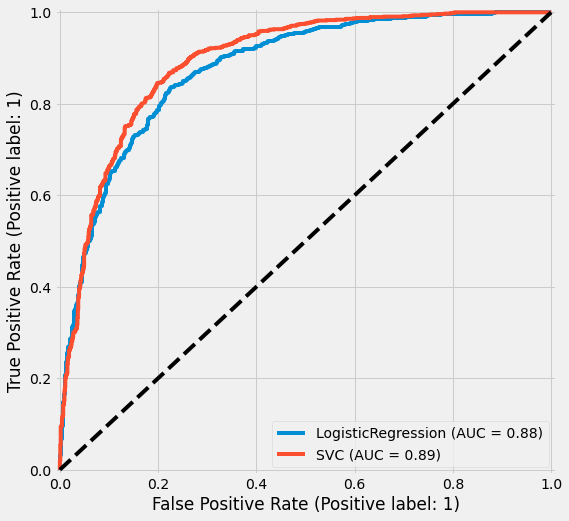

In [58]:
fig, ax = plt.subplots(figsize=(8,8))
plot_roc_curve(logreg, X_test, y_test, ax=ax)
plot_roc_curve(svc, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1], color = 'black', linestyle = '--')
plt.xlim(-.01, 1.01)
plt.ylim(-.01, 1.01)

plt.show()